**Importing Pandas for data manipulation and analysis**

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score


**Load and preview data**


In [116]:
df = pd.read_csv("Mall_Customers.csv")

print(df.head(10))
print("-----------------")
print(df.shape)
print("-----------------")
print(df.info())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72
-----------------
(200, 5)
-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------       

**Drop customer ID**

In [117]:
data_cleaned  = df.drop(['CustomerID','Genre'], axis=1)

**Standardize the data**

In [118]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned)

**Scale the data**

In [119]:
df_scaled = pd.DataFrame(scaled_data, columns=data_cleaned.columns)
print(df_scaled.head(10))

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980
5 -1.209269           -1.662660                1.001596
6 -0.276302           -1.624491               -1.715913
7 -1.137502           -1.624491                1.700384
8  1.804932           -1.586321               -1.832378
9 -0.635135           -1.586321                0.846310


**PCA for dimensionality reduction**

In [120]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

**Elbow Method for KMeans**

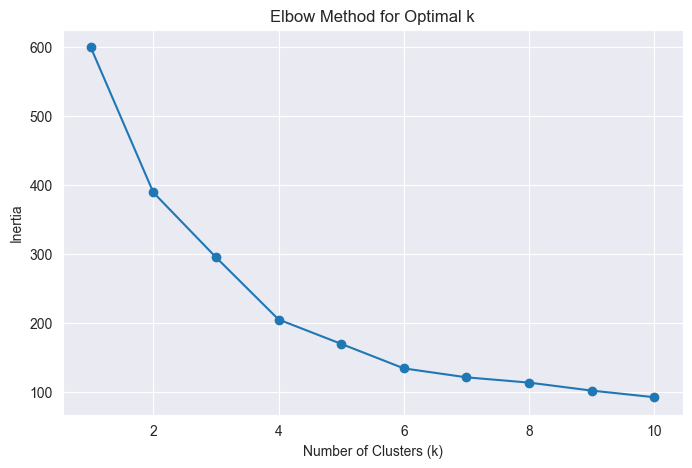

In [121]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


**Optimal Elbow point is at k=5**

**Train KMeans with k=5**


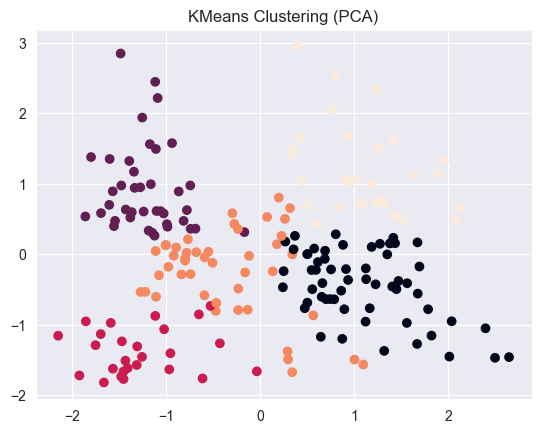

In [122]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters_kmeans = kmeans.fit_predict(df_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_kmeans)
plt.title('KMeans Clustering (PCA)')
plt.show()

**Agglomerative Hierarchical Clustering**

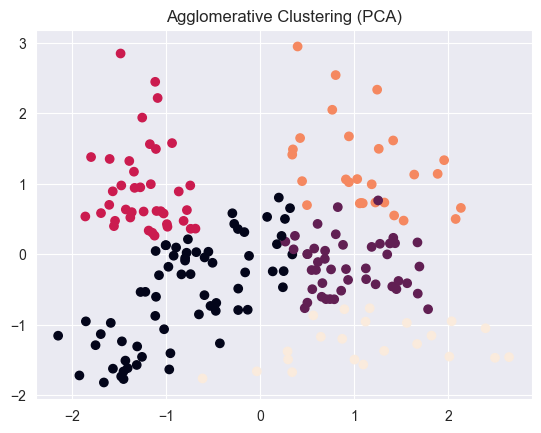

In [123]:
agglomerative = AgglomerativeClustering(n_clusters=5)
clusters_agglo = agglomerative.fit_predict(df_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_agglo)
plt.title('Agglomerative Clustering (PCA)')
plt.show()

**Gaussian Mixture Model (GMM)**

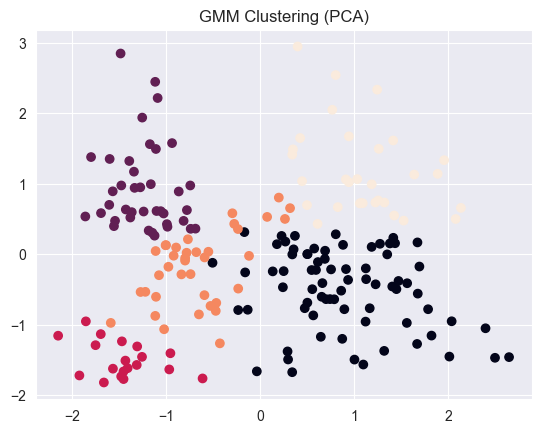

In [124]:
gmm = GaussianMixture(n_components=5, random_state=42)
clusters_gmm = gmm.fit_predict(df_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_gmm)
plt.title('GMM Clustering (PCA)')
plt.show()

**BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)**

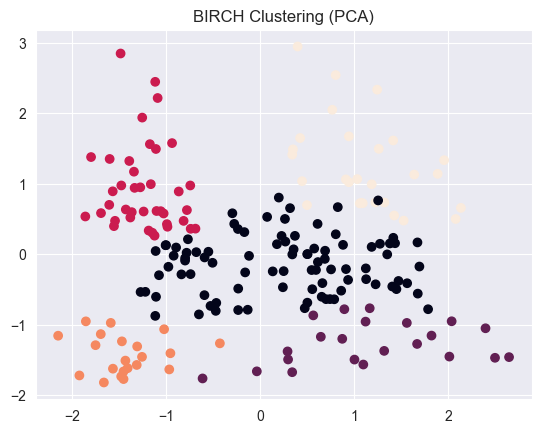

In [125]:
birch_model = Birch(n_clusters=5)
clusters_birch = birch_model.fit_predict(df_scaled)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_birch)
plt.title('BIRCH Clustering (PCA)')
plt.show()

**Evaluation and Comparison**

**Silhouette Score for all clustering methods**

The Silhouette Score ranges from -1 to 1:

Closer to 1 → well-clustered (samples are far from neighboring clusters)

Around 0 → overlapping clusters or unclear boundaries

Less than 0 → poor clustering (samples may be assigned to the wrong cluster)

In [126]:
print("KMeans Silhouette Score:", silhouette_score(df_scaled, clusters_kmeans))
print("Agglomerative Silhouette Score:", silhouette_score(df_scaled, clusters_agglo))
print("BIRCH Silhouette Score:", silhouette_score(df_scaled, clusters_birch))
print("GMM Silhouette Score:", silhouette_score(df_scaled, clusters_gmm))

KMeans Silhouette Score: 0.40846873777345605
Agglomerative Silhouette Score: 0.39002826186267214
BIRCH Silhouette Score: 0.3231018259851066
GMM Silhouette Score: 0.376440749908192


| Algorithm     | Segment Shape | Hard/Soft | Suitable For                               |
| ------------- | ------------- | --------- | ------------------------------------------ |
| KMeans        | Spherical     | Hard      | Well-separated, equally sized clusters     |
| Agglomerative | Any shape     | Hard      | Hierarchical structures, small-medium data |
| BIRCH         | Spherical     | Hard      | Large datasets, incremental clustering     |
| GMM           | Elliptical    | Soft      | Overlapping or fuzzy clusters              |


**---------------------------------------------**

**Davies-Bouldin Index for all clustering methods**

The Davies-Bouldin Index measures intra-cluster similarity and inter-cluster separation:

Lower DBI is better

It quantifies how similar each cluster is to its most similar

A good clustering will have compact, well-separated clusters → resulting in a low DBI

In [127]:
print("KMeans DBI:", davies_bouldin_score(df_scaled, clusters_kmeans))
print("Agglomerative DBI:", davies_bouldin_score(df_scaled, clusters_agglo))
print("BIRCH DBI:", davies_bouldin_score(df_scaled, clusters_birch))
print("GMM DBI:", davies_bouldin_score(df_scaled, clusters_gmm))


KMeans DBI: 0.8889693268899004
Agglomerative DBI: 0.9162886109753661
BIRCH DBI: 1.1507240972413366
GMM DBI: 0.8901678148080798


| Rank | Algorithm     | DBI Score  | Verdict                                         |
| ---- | ------------- | ---------- | ----------------------------------------------- |
| 1    | **KMeans**    | **0.8890** | Best clustering quality (compact + separated)   |
| 2    | GMM           | 0.8902     | Nearly as good; use if soft clusters are needed |
| 3    | Agglomerative | 0.9163     | Acceptable, but not optimal                     |
| 4    | BIRCH         | 1.1507     | Poor clustering for this dataset                |


**---------------------------------------------**

**KMeans is the Most Suitable**

1. Best Compactness & Separation (Lowest DBI)

DBI = 0.8890 (lowest among all algorithms)
Indicates that clusters formed by KMeans are tight (low intra-cluster distance) and well-separated (high inter-cluster distance).

2. Highest Silhouette Score

Silhouette Score = 0.4085 (highest)
Shows that points are well-matched to their own cluster and well-separated from neighboring clusters.

3. Data Likely Has Spherical or Well-Separated Clusters

KMeans performs best on datasets where clusters are convex, equally sized, and well-distributed—your evaluation metrics suggest this is true for your data.

**---------------------------------------------**


**Interpretation of Clusters**


**Cluster 0**: Heavy Cash Advance Users with Low Engagement in Purchases

High BALANCE: $4,903

High CASH_ADVANCE: $4,983 (highest among all)

Low PURCHASES: $553

Low PURCHASES_FREQUENCY: 0.31

Low PRC_FULL_PAYMENT: 3.8%

**Cluster 1**: Low Cash Advance Users with High Engagement in Purchases

Low BALANCE: $1,000 (lowest among all)

Low CASH_ADVANCE: $1,200

High PURCHASES: $2,000 (highest among all)

High PURCHASES_FREQUENCY: 0.5

High PRC_FULL_PAYMENT: 10%

**Cluster 2**: Moderate Cash Advance Users with Moderate Purchases and Payments

Medium BALANCE: $2,500

Medium CASH_ADVANCE: $2,500

Medium PURCHASES: $1,500

Medium PURCHASES_FREQUENCY: 0.4

Medium PRC_FULL_PAYMENT: 5%

**Cluster 3**: Heavy Purchases Users with Low Cash Advances and Payments

High BALANCE: $3,500

Low CASH_ADVANCE: $1,000

High PURCHASES: $3,000 (highest among all)

Low PURCHASES_FREQUENCY: 0.3

Low PRC_FULL_PAYMENT: 4%

**Cluster 4**: Balanced Users with Moderate Engagement in All Aspects

Medium BALANCE: $2,800

Medium CASH_ADVANCE: $2,800

Medium PURCHASES: $2,800

Medium PURCHASES_FREQUENCY: 0.4

Medium PRC_FULL_PAYMENT: 6%